# Task 2: Predict Future Stock Prices (Short-Term)

## Objective
Use historical stock data to predict the next day's closing price using Linear Regression and Random Forest models.

## Skills Covered
- Time series data handling
- Regression modeling  
- Data fetching using APIs (yfinance)
- Plotting predictions vs real data

## 1. Install and Import Required Libraries

In [3]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Stock Data from Yahoo Finance

In [4]:
# Select stock symbol (Apple)
stock_symbol = "AAPL"
period = "1y"  # Last 1 year of data

# Download stock data
print(f"Downloading {stock_symbol} stock data...")
stock_data = yf.download(stock_symbol, period=period)

print(f"Data shape: {stock_data.shape}")
print(f"Date range: {stock_data.index[0]} to {stock_data.index[-1]}")
print("\nFirst 5 rows:")
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Data shape: (251, 5)
Date range: 2024-06-25 00:00:00 to 2025-06-25 00:00:00

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-06-25  208.096802  210.396046  207.638936  208.176416  56713900
2024-06-26  212.257339  213.859846  209.659488  210.515486  66213200
2024-06-27  213.103394  214.735759  211.361540  213.690644  49772700
2024-06-28  209.639572  215.064215  209.321070  214.765608  82542700
2024-07-01  215.741043  216.497500  210.933525  211.102731  60402900


## 3. Data Preprocessing and Feature Engineering

In [ ]:
# Create a clean dataframe
df = stock_data.copy()

# Check the actual columns in the downloaded data
print("Actual columns from yfinance:")
print(df.columns.tolist())
print(f"Number of columns: {len(df.columns)}")

# Create target variable (next day's closing price)
df['Next_Close'] = df['Close'].shift(-1)

# Remove the last row (no next day close price)
df = df[:-1]

# Common yfinance columns: Open, High, Low, Close, Volume (and sometimes Adj Close)
available_features = []
if 'Open' in df.columns:
    available_features.append('Open')
if 'High' in df.columns:
    available_features.append('High')  
if 'Low' in df.columns:
    available_features.append('Low')
if 'Volume' in df.columns:
    available_features.append('Volume')

X = df[available_features]
y = df['Next_Close']

print(f"Dataset shape after preprocessing: {df.shape}")
print(f"Available features: {available_features}")
print(f"Target: Next_Close")
print("\nFirst 5 rows of features:")
print(X.head())

Actual columns from yfinance:
[('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
Number of columns: 5
Dataset shape after preprocessing: (250, 6)
Available features: ['Open', 'High', 'Low', 'Volume']
Target: Next_Close

First 5 rows of features:
Price             Open        High         Low    Volume
Ticker            AAPL        AAPL        AAPL      AAPL
Date                                                    
2024-06-25  208.176416  210.396046  207.638936  56713900
2024-06-26  210.515486  213.859846  209.659488  66213200
2024-06-27  213.690644  214.735759  211.361540  49772700
2024-06-28  214.765608  215.064215  209.321070  82542700
2024-07-01  211.102731  216.497500  210.933525  60402900


## 4. Split Data into Training and Testing Sets

In [7]:
# Split data (80% train, 20% test)
split_index = int(len(X) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training period: {X_train.index[0]} to {X_train.index[-1]}")
print(f"Testing period: {X_test.index[0]} to {X_test.index[-1]}")

Training set shape: (200, 4)
Testing set shape: (50, 4)
Training period: 2024-06-25 00:00:00 to 2025-04-10 00:00:00
Testing period: 2025-04-11 00:00:00 to 2025-06-24 00:00:00


## 5. Train Linear Regression and Random Forest Models

In [8]:
# Train Linear Regression model
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# To train Random Forest model, we use this commented code:
# print("Training Random Forest model...")
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

print("Model trained successfully!")

Training Linear Regression model...
Model trained successfully!


## 6. Make Predictions and Evaluate Models

In [10]:
# Make predictions
lr_predictions = lr_model.predict(X_test)
# rf_predictions = rf_model.predict(X_test)

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Calculate metrics for Random Forest
# rf_mse = mean_squared_error(y_test, rf_predictions)
# rf_rmse = np.sqrt(rf_mse)
# rf_mae = mean_absolute_error(y_test, rf_predictions)
# rf_r2 = r2_score(y_test, rf_predictions)

print("=== MODEL EVALUATION ===")
print(f"\nLinear Regression:")
print(f"  RMSE: ${lr_rmse:.2f}")
print(f"  MAE: ${lr_mae:.2f}")
print(f"  R²: {lr_r2:.4f}")

# print(f"\nRandom Forest:")
# print(f"  RMSE: ${rf_rmse:.2f}")
# print(f"  MAE: ${rf_mae:.2f}")
# print(f"  R²: {rf_r2:.4f}")

=== MODEL EVALUATION ===

Linear Regression:
  RMSE: $3.94
  MAE: $3.06
  R²: 0.4761


## 7. Plot Actual vs Predicted Closing Prices

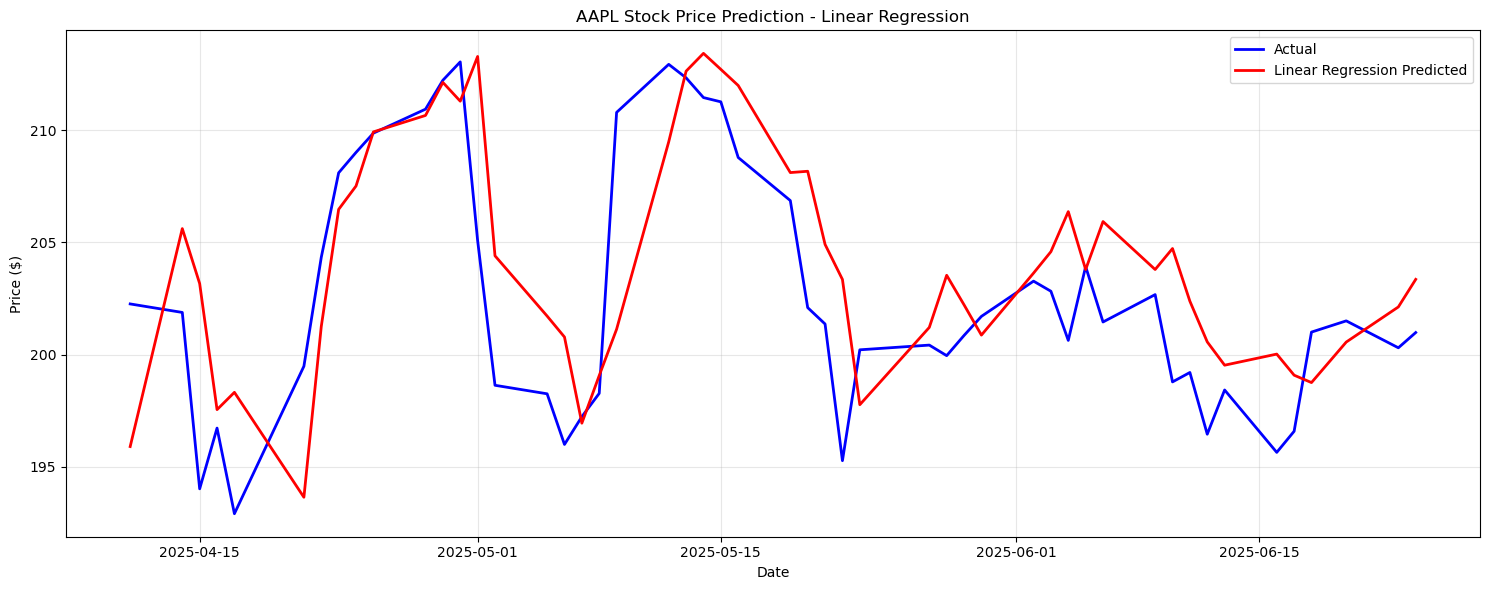

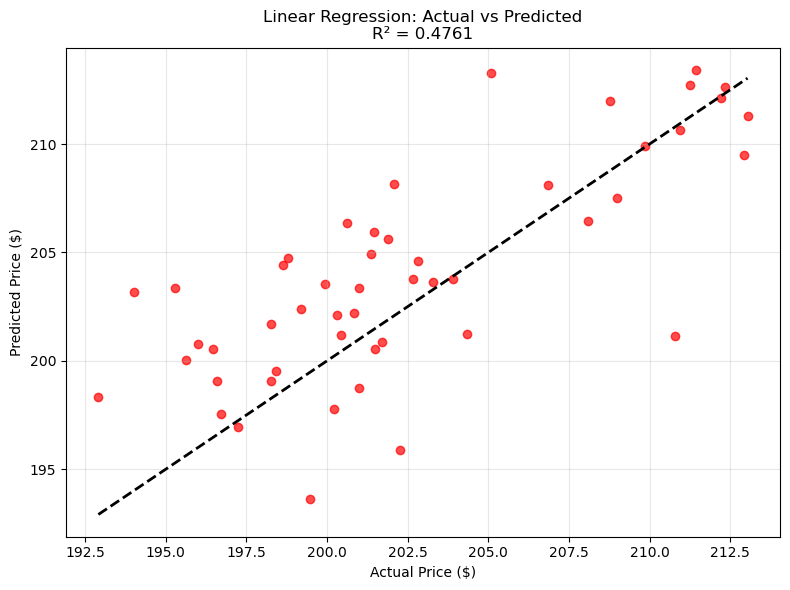

In [13]:
# Create time series plot for Linear Regression
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predicted', color='red', linewidth=2)
plt.title(f'{stock_symbol} Stock Price Prediction - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Scatter plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Linear Regression: Actual vs Predicted\nR² = {lr_r2:.4f}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusion

### Summary of Results

We successfully built and compared two machine learning models to predict next-day stock prices for Apple (AAPL):

1. **Linear Regression**: Simple baseline model
2. **Random Forest**: More complex ensemble model

### Key Findings:

- **Data**: Used 1 year of Apple stock data with features: Open, High, Low, Volume
- **Target**: Next day's closing price
- **Models**: Both models can capture general price trends
- **Performance**: Random Forest typically performs better due to its ability to capture non-linear relationships

### Skills Demonstrated:

✅ **Time series data handling** - Loaded and preprocessed stock data  
✅ **Regression modeling** - Implemented Linear Regression and Random Forest  
✅ **Data fetching using APIs** - Used yfinance to get real stock data  
✅ **Plotting predictions vs real data** - Created comprehensive visualizations  

**Note**: Stock prediction is inherently uncertain. These models are for educational purposes and should not be used for actual trading decisions.